## Intrinsic currents spiking
* https://nest-simulator.readthedocs.io/en/latest/auto_examples/intrinsic_currents_spiking.html

### Reference for the model neuron(ht_neuron)
* Hill and Tononi (2005) Modeling sleep and wakefulness in the thalamocortical system. J Neurophysiol 93:1671 https://doi.org/10.1152/jn.00915.2004



In [39]:
import matplotlib.pyplot as plt
import nest

In [40]:
#nest.set_verbosity("M_WARNING")
nest.ResetKernel()


In [41]:
rate_in = 100.0
w_recep = {"AMPA": 30.0, "NMDA": 30.0, "GABA_A": 5.0, "GABA_B": 10.0}
t_sim = 250.0

num_recep = len(w_recep)

In [42]:
#   - membrane potential
#   - threshold potential
#   - synaptic conductances
#   - intrinsic currents
#
# See :doc:`intrinsic_currents_subthreshold` for more details on ``multimeter``
# configuration.

nrn = nest.Create("ht_neuron")
p_gens = nest.Create("poisson_generator", 4, params={"rate": rate_in})
mm = nest.Create(
    "multimeter",
    params={
        "interval": 0.1,
        "record_from": ["V_m", "theta", "g_AMPA", "g_NMDA", "g_GABA_A", "g_GABA_B", "I_NaP", "I_KNa", "I_T", "I_h"],
    },
)

In [43]:
receptors = nest.GetDefaults("ht_neuron")["receptor_types"]
for index, (rec_name, rec_wgt) in enumerate(w_recep.items()):
    nest.Connect(p_gens[index], nrn, syn_spec={"receptor_type": receptors[rec_name], "weight": rec_wgt})

In [44]:
nest.Connect(mm, nrn)

nest.Simulate(t_sim)


Oct 10 09:27:35 NodeManager::prepare_nodes [Info]: 
    Preparing 6 nodes for simulation.

Oct 10 09:27:35 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 6
    Simulation time (ms): 250
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 10 09:27:35 SimulationManager::run [Info]: 
    Simulation finished.


In [45]:
data = mm.events
t = data["times"]

In [46]:
def texify_name(name):
    if len(name.split("_")) == 1:
        return r"${}$".format(name)
    elif len(name.split("_")) == 2:
        return r"${}_{{\mathrm{{{}}}}}$".format(*name.split("_"))
    elif len(name.split("_")) == 3:
        return r"${}_{{\mathrm{{{}_{}}}}}$".format(*name.split("_"))
    

Text(0.5, 0, 'Time [ms]')

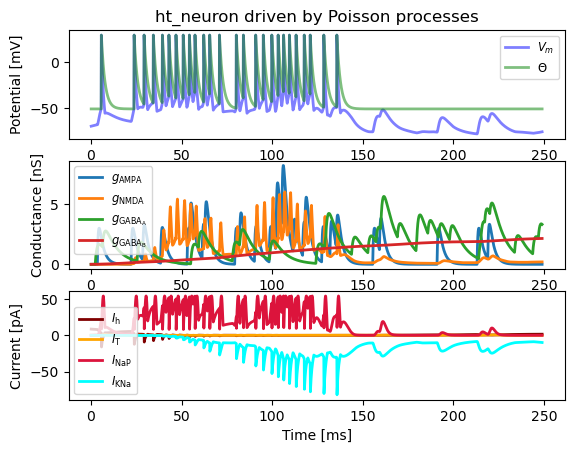

In [47]:
fig = plt.figure()

Vax = fig.add_subplot(311)
Vax.plot(t, data["V_m"], "b", lw=2, label=r"$V_m$", alpha=0.5)
Vax.plot(t, data["theta"], "g", lw=2, label=r"$\Theta$", alpha=0.5)
Vax.set_ylabel("Potential [mV]")

try:
    Vax.legend(fontsize="small")
except TypeError:
    Vax.legend()  # work-around for older Matplotlib versions
Vax.set_title("ht_neuron driven by Poisson processes")

Gax = fig.add_subplot(312)
for gname in ("g_AMPA", "g_NMDA", "g_GABA_A", "g_GABA_B"):
    Gax.plot(t, data[gname], lw=2, label=texify_name(gname))

try:
    Gax.legend(fontsize="small")
except TypeError:
    Gax.legend()  # work-around for older Matplotlib versions
Gax.set_ylabel("Conductance [nS]")

Iax = fig.add_subplot(313)
for iname, color in (("I_h", "maroon"), ("I_T", "orange"), ("I_NaP", "crimson"), ("I_KNa", "aqua")):
    Iax.plot(t, data[iname], color=color, lw=2, label=texify_name(iname))

try:
    Iax.legend(fontsize="small")
except TypeError:
    Iax.legend()  # work-around for older Matplotlib versions
Iax.set_ylabel("Current [pA]")
Iax.set_xlabel("Time [ms]")